<a href="https://www.kaggle.com/code/sedimir/reading-date-time-as-an-index-or-as-a-column?scriptVersionId=127957173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Reading DATE_TIME as an INDEX or as a COLUMN
<font size='+1'> 
Reading the datetime as the index while reading a CSV file can sometimes cause issues with the exported datetime index (example below: reading CSV file into 'gen1a'). To avoid these issues, there are two strategies you can use:

  1. Define the datetime format as reading the CSV file and assign the datetime to the index useing 'date_parser' parameter. This approach can be seen in reading CSV file into the 'gen1b' dataframe in the code example below. Functions like 'resample()', slicing based on the index, and filtering such as 'df.index.day' are available to work with the datetime index. 

    
  2. Read the CSV files without defining the datetime index, and then in a subsequent step, define formatting of the datetime column. This approach can be seen in reading CSV file into the 'gen1c' dataframe in the code example below. Functions like '.dt.day' are available to work with the datetime column. 

  </font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

Text(0.5, 1.0, 'gen1c month')

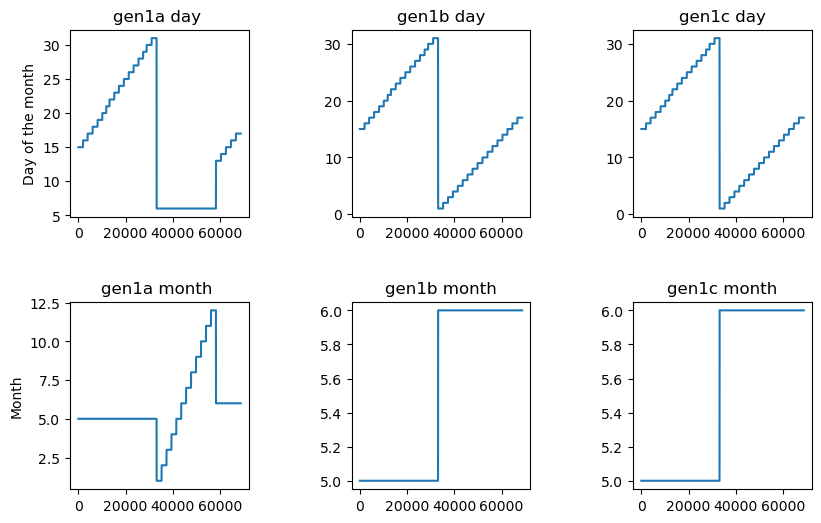

In [2]:
####### reading datetime as an index ####### 
gen1a=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'])

####### reading datetime as an index with a defined format ####### 
from datetime import datetime
custom_date_parser = lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M') 
gen1b=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv',index_col='DATE_TIME', parse_dates=['DATE_TIME'], date_parser=custom_date_parser)

####### reading datetime as a column ###### 
gen1c=pd.read_csv('/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv')
gen1c.DATE_TIME=pd.to_datetime(gen1c.DATE_TIME,format='%d-%m-%Y %H:%M')


f,ax=plt.subplots(2,3, figsize=(9,6))
plt.tight_layout(pad=4)

ax[0,0].plot(gen1a.index.day) #- gen1a.index.day)
ax[0,0].set_title('gen1a day ')
ax[0,0].set_ylabel('Day of the month')

ax[0,1].plot(gen1b.index.day) #- gen1a.index.day)
ax[0,1].set_title('gen1b day')

ax[0,2].plot(gen1c.DATE_TIME.dt.day) #- gen1a.index.day)
ax[0,2].set_title('gen1c day')

ax[1,0].plot(gen1a.index.month) #- gen1a.index.day)
ax[1,0].set_title('gen1a month ')
ax[1,0].set_ylabel('Month')

ax[1,1].plot(gen1b.index.month) #- gen1a.index.day)
ax[1,1].set_title('gen1b month')

ax[1,2].plot(gen1c.DATE_TIME.dt.month) #- gen1a.index.day)
ax[1,2].set_title('gen1c month')
